Linear Regression R²: 0.37475248028193997, MSE: 65548102000.55201
Ridge Regression R²: 0.37481617692822733, MSE: 65541424334.289825


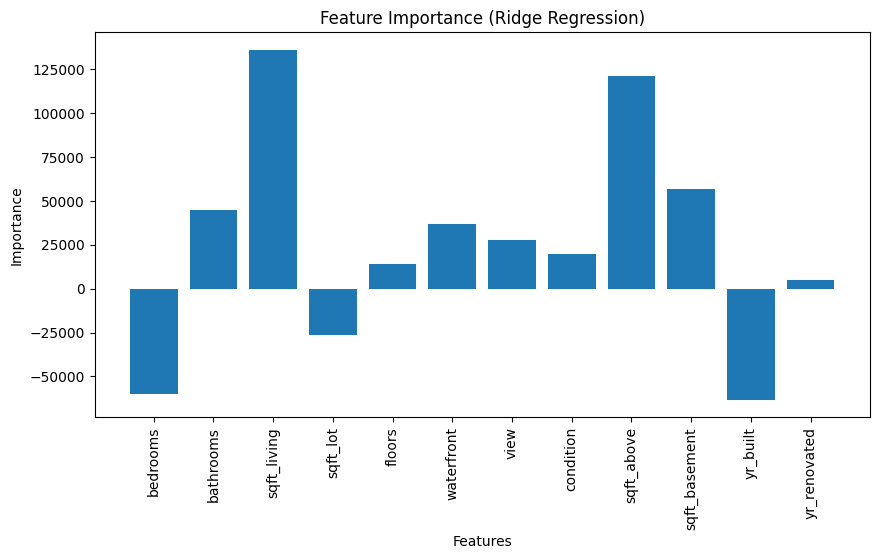

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("Usa Housing Dataset.csv")
df.drop(columns=['date', 'street', 'city', 'statezip', 'country'], inplace=True)
le = LabelEncoder()
if 'waterfront' in df.columns:
    df['waterfront'] = le.fit_transform(df['waterfront'])
if 'view' in df.columns:
    df['view'] = le.fit_transform(df['view'])


df.fillna(df.median(), inplace=True)
X = df.drop(columns=['price']) 
y = df['price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)


r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Linear Regression R²: {r2_lr}, MSE: {mse_lr}")
print(f"Ridge Regression R²: {r2_ridge}, MSE: {mse_ridge}")
features = df.drop(columns=['price']).columns
importance = ridge_model.coef_

plt.figure(figsize=(10, 5))
plt.bar(features, importance)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Ridge Regression)')
plt.show()